In [141]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df_cop = pd.read_csv("../datasets/LST_Copernicus.csv")
df_mod = pd.read_csv("../datasets/LST_MODIS.csv")
df_meteo = pd.read_csv("../datasets/meteostat_tempratures.csv")


In [143]:
df_cop['time'] = pd.to_datetime(df_cop['time'])
df_mod['time'] = pd.to_datetime(df_mod['time'])
df_meteo['time'] = pd.to_datetime(df_meteo['time'])


df_cop.set_index('time', inplace=True)
df_mod.set_index('time', inplace=True)
df_meteo.set_index('time', inplace=True)

<Axes: xlabel='time'>

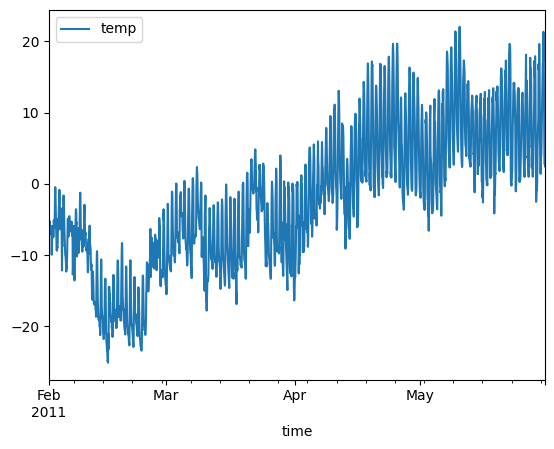

In [144]:
df_cop.plot()

<Axes: xlabel='time'>

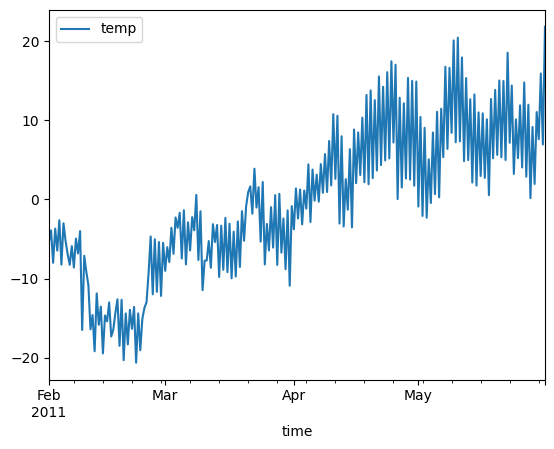

In [145]:
df_mod.plot()

<Axes: xlabel='time'>

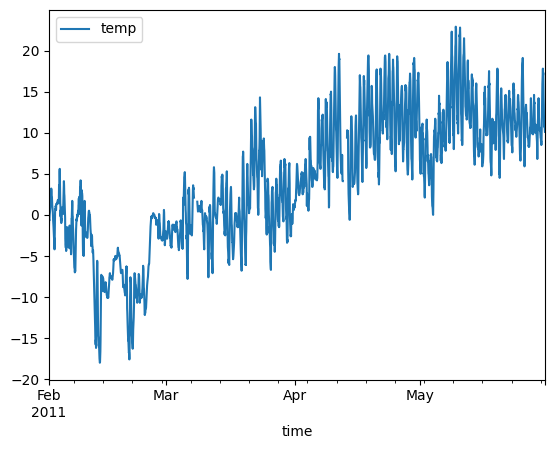

In [146]:
df_meteo.plot()

In [147]:
df_meteo.head()

,temp
time,
2011-02-01 00:00:00,-1.4
2011-02-01 01:00:00,-0.6
2011-02-01 02:00:00,-0.7
2011-02-01 03:00:00,-0.6
2011-02-01 04:00:00,0.0


In [148]:
df_cop.head()

,temp
time,
2011-02-01 00:00:00,-4.921973
2011-02-01 01:00:00,-6.254889
2011-02-01 02:00:00,-6.072241
2011-02-01 03:00:00,-5.648779
2011-02-01 04:00:00,-5.243689


In [149]:
# plt.plot(df_cop.index,df_cop['temp'], label='copernicus')
# plt.plot(df_cop.index,df_meteo['temp'], label='meteostat')
# plt.legend()
# plt.show()

In [150]:
df_meteo.head()

,temp
time,
2011-02-01 00:00:00,-1.4
2011-02-01 01:00:00,-0.6
2011-02-01 02:00:00,-0.7
2011-02-01 03:00:00,-0.6
2011-02-01 04:00:00,0.0


In [151]:
meteo_daily = df_meteo.resample('D').mean()
cop_daily = df_cop.resample('D').mean()
mod_daile = df_mod.resample('D').mean()

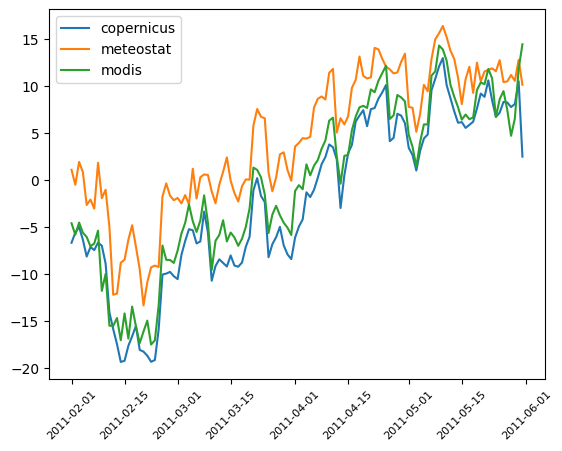

In [152]:
plt.plot(cop_daily.index,cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index,meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index,mod_daile['temp'], label='modis')
plt.legend()
plt.xticks(fontsize=8, rotation=45)
plt.show()

In [153]:
avg_temp_df = meteo_daily

In [154]:
meteostat = meteo_daily['temp'].tolist()
copernicus = cop_daily['temp'].tolist()
modis = mod_daile['temp'].tolist()


print(len(meteostat),len(copernicus),len(modis))

120 120 120


In [155]:
avg_temp = []
tempratures = []
for x in range(120):
    avg_temp.append(((meteostat[x]+copernicus[x]+modis[x])/3))
    tempratures.append([meteostat[x],copernicus[x],modis[x]])

In [156]:
avg_temp_df['temp'] = avg_temp

In [157]:
avg_temp_df.head()

,temp
time,
2011-02-01,-3.421308
2011-02-02,-4.000546
2011-02-03,-2.556825
2011-02-04,-3.731905
2011-02-05,-5.645168


# GDD formula: GDD = (T_max + T_min)/2 - T_base


In [158]:
import numpy as np

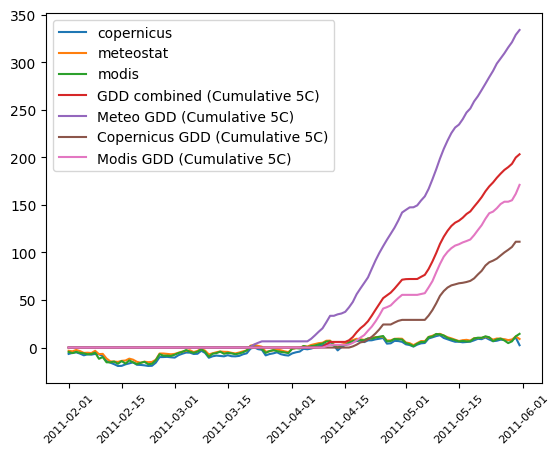

In [159]:
gdd = []
base = 5
cumulative_gdd = 0

for x in tempratures:
    daily_avg_temp = (max(x) + min(x)) / 2 
    daily_gdd = max(0, daily_avg_temp - base) 
    cumulative_gdd += daily_gdd
    gdd.append(cumulative_gdd)

Meteo_gdd = []
meteo_cumulative_gdd = 0

for x in meteostat:
    daily_avg_temp = x
    daily_gdd = max(0, daily_avg_temp - base)
    meteo_cumulative_gdd += daily_gdd 
    Meteo_gdd.append(meteo_cumulative_gdd)  

Copernicus_gdd = []
Copernicus_cumulative_gdd = 0

for x in copernicus:
    daily_avg_temp = x
    daily_gdd = max(0, daily_avg_temp - base)
    Copernicus_cumulative_gdd += daily_gdd 
    Copernicus_gdd.append(Copernicus_cumulative_gdd)  

Modis_gdd = []
Modis_cumulative_gdd = 0

for x in modis:
    daily_avg_temp = x
    daily_gdd = max(0, daily_avg_temp - base)
    Modis_cumulative_gdd += daily_gdd 
    Modis_gdd.append(Modis_cumulative_gdd) 

avg_temp
plt.plot(cop_daily.index, cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index, meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index, mod_daile['temp'], label='modis')
plt.plot(cop_daily.index, gdd, label='GDD combined (Cumulative 5C)')  
plt.plot(cop_daily.index, Meteo_gdd, label='Meteo GDD (Cumulative 5C)')
plt.plot(cop_daily.index, Copernicus_gdd, label='Copernicus GDD (Cumulative 5C)')
plt.plot(cop_daily.index, Modis_gdd, label='Modis GDD (Cumulative 5C)')
plt.legend()
plt.xticks(fontsize=8, rotation=45)

plt.show()

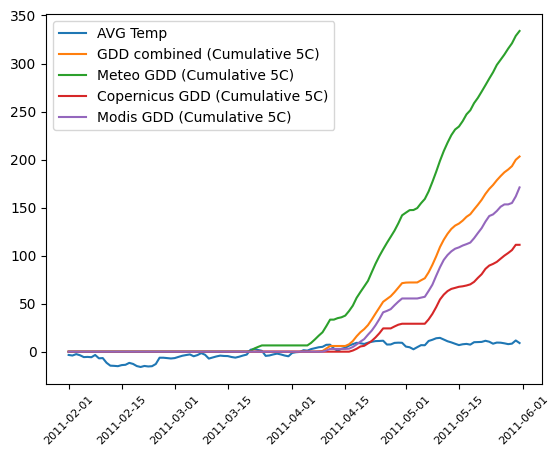

In [160]:

plt.plot(cop_daily.index, avg_temp, label='AVG Temp')
plt.plot(cop_daily.index, gdd, label='GDD combined (Cumulative 5C)')  
plt.plot(cop_daily.index, Meteo_gdd, label='Meteo GDD (Cumulative 5C)')
plt.plot(cop_daily.index, Copernicus_gdd, label='Copernicus GDD (Cumulative 5C)')
plt.plot(cop_daily.index, Modis_gdd, label='Modis GDD (Cumulative 5C)')
plt.legend()
plt.xticks(fontsize=8, rotation=45)

plt.show()

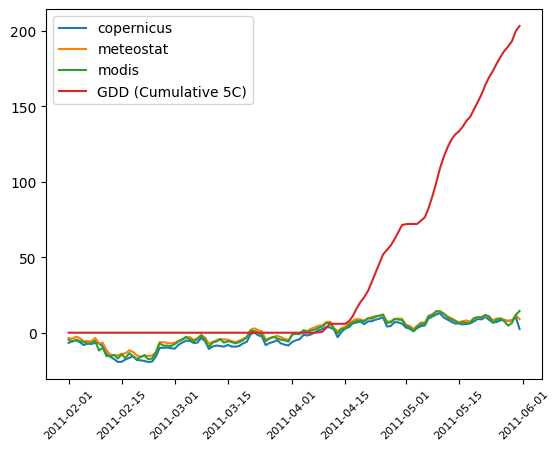

In [161]:



plt.plot(cop_daily.index, cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index, meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index, mod_daile['temp'], label='modis')  # Fixed typo
plt.plot(cop_daily.index, gdd, label='GDD (Cumulative 5C)')  # Plot cumulative GDD
plt.legend()
plt.xticks(fontsize=8, rotation=45)

plt.show()

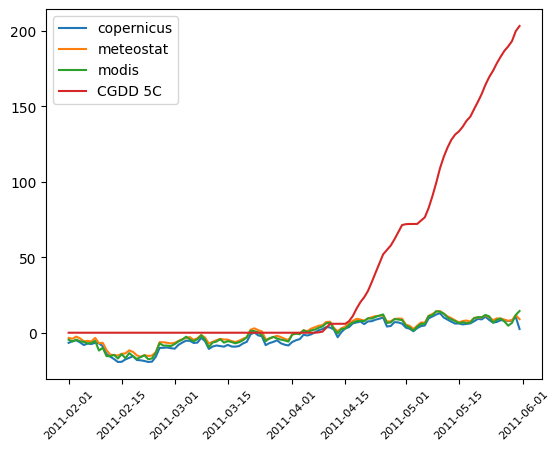

In [162]:
base = 5
cgdd = []
cumulative_gdd = 0  # Initialize cumulative GDD

# Loop through the temperature data starting from the desired start of the growing season
for x in tempratures:
    daily_avg_temp = (max(x) + min(x)) / 2  # Average of max and min temp
    daily_gdd = max(0, daily_avg_temp - base)  # Ensure GDD is not negative
    cumulative_gdd += daily_gdd  # Add daily GDD to cumulative total
    cgdd.append(cumulative_gdd)  # Store cumulative GDD (CGDD)

# Plot the temperature data and CGDD
plt.plot(cop_daily.index, cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index, meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index, mod_daile['temp'], label='modis')
plt.plot(cop_daily.index, cgdd, label='CGDD 5C')  # Plot CGDD
plt.legend()
plt.xticks(fontsize=8, rotation=45)

plt.show()

In [163]:
if gdd == cgdd:
    print('yes')

yes
